데이터 증강을 통해 모델의 안정성을 높일 수 있다.

ImageDataGenerator를 통해서 다양한 데이터 증강을 할 수 있다.

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [3]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

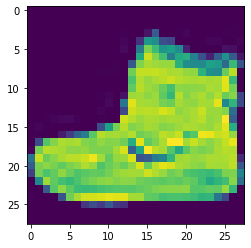

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [5]:
import numpy as np
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)


In [6]:
x_train.shape

(60000, 28, 28, 1)

회전과 수평반전을 추가해서 이미지를 증강해보자

In [7]:
# Generator의 Instance 만들기
datagen = ImageDataGenerator(    
    rotation_range=20,
    horizontal_flip=True)

In [8]:
datagen.fit(x_train) # 데이터에 대해서 적용

In [9]:
batches=datagen.flow(x_train, y_train, batch_size=32)  # 배치 단위로 데이터 받기

In [10]:
x_batch, y_batch = next(batches) #next를 통해서 한 배치씩 가져올 수 있다.

In [11]:
x_batch.shape

(32, 28, 28, 1)

In [12]:
y_batch.shape

(32, 10)

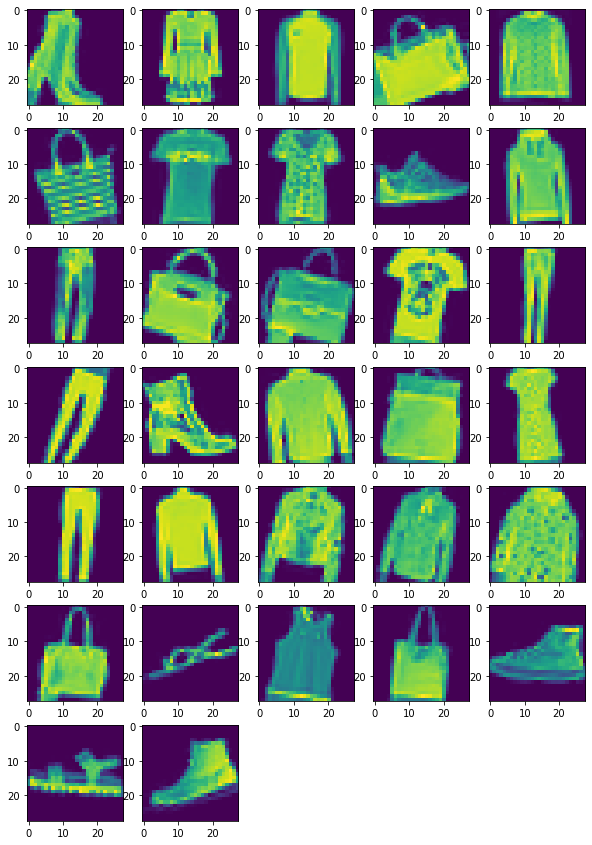

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(x_batch[i,:,:,0])

옵션 지정을 통해서 증강된 이미지를 저장할 수 있다. 

In [14]:
!mkdir 'aug'

In [15]:
batches=datagen.flow(x_train, y_train, batch_size=32, save_to_dir='aug',save_format="png")

In [16]:
batches.next()  # 이때가 실제 실행됨

(array([[[[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.16537628],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.08722052],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.00709227],
          [0.        ],
          [0.        ]],
 
         ...,
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]]],
 
 
        [

In [17]:
!ls

aug  sample_data


In [18]:
!ls 'aug'

_14498_3654.png  _29310_192.png   _38391_2872.png  _50378_2201.png
_19566_1539.png  _30421_1111.png  _39367_3129.png  _51035_67.png
_20683_1054.png  _30721_9554.png  _41676_9284.png  _52324_2035.png
_24230_2220.png  _31408_1937.png  _42212_3944.png  _52542_807.png
_24817_1359.png  _32355_733.png   _4505_7696.png   _52682_6770.png
_26248_5057.png  _33958_8749.png  _45070_3315.png  _53710_1812.png
_27209_4975.png  _36099_8773.png  _46003_1420.png  _8149_5270.png
_2863_552.png	 _36468_819.png   _46379_1293.png  _860_3021.png


In [19]:
len(x_train)

60000

In [20]:
len(batches)

1875

In [21]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [23]:
epochs = 10
histoy = model.fit(datagen.flow(x_train, y_train, batch_size=32),
          epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 36s 14ms/step - loss: 0.8177 - acc: 0.7405 - val_loss: 0.5561 - val_acc: 0.8079
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5306 - acc: 0.8072 - val_loss: 0.5335 - val_acc: 0.8205
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4956 - acc: 0.8212 - val_loss: 0.4581 - val_acc: 0.8446
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4681 - acc: 0.8302 - val_loss: 0.4578 - val_acc: 0.8447
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4515 - acc: 0.8357 - val_loss: 0.5087 - val_acc: 0.8322
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4414 - acc: 0.8407 - val_loss: 0.4572 - val_acc: 0.8467
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4404 - acc: 0.8400 - val_loss: 0.4312 - val_acc: 0.8509
Epoch 8/10
1875/1875 [==========================